In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [203]:
dataset = pd.read_csv("data.csv",index_col=0)

In [204]:
dataset.head()

,title,genre,duration,rating,year,director,major cast,2nd major cast,certification,gross,votes,link,budget
0,The Shawshank Redemption,Drama,142,9.3,1994,Frank Darabont,Tim Robbins,Morgan Freeman,A,28340000.0,2657521,https://www.imdb.com/title/tt0111161/,25000000
1,The Godfather,"Crime, Drama",175,9.2,1972,Francis Ford Coppola,Marlon Brando,Al Pacino,A,134970000.0,1841839,https://www.imdb.com/title/tt0068646/,6000000
3,The Dark Knight,"Action, Crime, Drama",152,9.0,2008,Christopher Nolan,Christian Bale,Heath Ledger,UA,534860000.0,2630272,https://www.imdb.com/title/tt0468569/,185000000
4,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",201,9.0,2003,Peter Jackson,Elijah Wood,Viggo Mortensen,U,377850000.0,1832328,https://www.imdb.com/title/tt0167260/,94000000
5,Schindler's List,"Biography, Drama, History",195,9.0,1993,Oskar Schindler,Steven Spielberg,Liam Neeson,A,96900000.0,1346124,https://www.imdb.com/title/tt0108052/,22000000


In [205]:
dataset.nunique()

title             743
genre             172
duration          130
rating             17
year               97
director          456
major cast        518
2nd major cast    625
certification      17
gross             666
votes             742
link              743
budget            325
dtype: int64

In [206]:
dataset.corr()

,duration,rating,year,gross,votes,budget
duration,1.000000,0.243311,0.132892,0.155517,0.202507,0.212205
rating,0.243311,1.000000,-0.167688,0.137837,0.589809,0.045656
year,0.132892,-0.167688,1.000000,0.268995,0.264812,0.394916
gross,0.155517,0.137837,0.268995,1.000000,0.582856,0.779805
votes,0.202507,0.589809,0.264812,0.582856,1.000000,0.507797
budget,0.212205,0.045656,0.394916,0.779805,0.507797,1.000000


In [207]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [208]:
x = dataset.iloc[:,[2,3,4,10,12]]
y = dataset.iloc[:,9].astype('int')

In [209]:
best_features= SelectKBest(score_func=chi2, k=3)
fit= best_features.fit(x,y)

In [210]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(x.columns)

In [211]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
1,rating,7.068368e+00
2,year,1.633854e+02
0,duration,3.951431e+03
3,votes,3.136662e+08
4,budget,5.912271e+10


In [221]:
x = dataset[['budget']]
y = dataset[['gross']]

In [222]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=100)

In [223]:
lin= LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

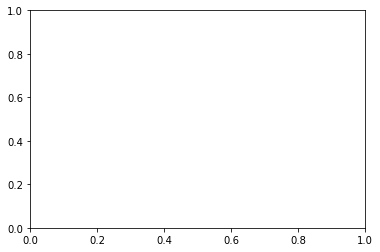

In [225]:
plt.plot(X_train, lin.predict(x), color='red', linewidth=3)
plt.title("Final Linear Regression Line Plot")
plt.plot()

In [201]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'